# Face Recognition using Eigen Faces
- **Team**: 21 din mein CG double
- **Authors**:
    - [Rutvij Menavlikar (2019111032)](https://github.com/Rutvij-1)
    - [Suyash Vardhan Mathur (2019114006)](https://github.com/MSurfer20)
    - [Tejas Chaudhari (2019111013)](https://github.com/tejas-1111)
    - [Tushar Choudhary (2019111019)](https://github.com/tusharc31)
    
Link to paper: https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf

In [1]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy import stats
import cv2
from PIL import Image

In [2]:
%matplotlib inline
random.seed(142)

### Loading the images and labels for train and test dataset

In [3]:
dataset_path = 'YaleDataset/'
dataset_dir  = os.listdir(dataset_path)
WIDTH  = 64   # Will resize images to this shape
HEIGHT = 64   # Will resize images to this shape
DIM = 20
# DIM = 1000

In [4]:
def load_images():
    """
    Load the images from folder and split them into training and testing sets, such that for a person, two of
    their images are in the testing set and the rest are in training set.
    """
    im_size=(WIDTH,HEIGHT)
    training_im, testing_im, training_label, testing_label = [], [], [], []
    types = ["centerlight", "glasses", "happy", "leftlight", "noglasses",
             "normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
    for i in range(1,16):
        im = {}
        testing_type = random.sample(types, 2)
        for t in types:
            im[t] = np.array(Image.open(dataset_path+"subject"+str(i).zfill(2)+"."+t),'uint8')
            im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
            if t in testing_type:
                testing_im.append(im[t])
                testing_label.append(i)
            else:
                training_im.append(im[t])
                training_label.append(i)
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)

In [5]:
training_im, training_label, testing_im, testing_label = load_images()

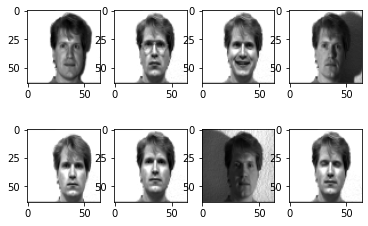

In [6]:
for i in range(min(training_im.shape[0],8)):
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

## Get Training Tensor, Mean Face and Normalised Face Vector

In [7]:
training_tensor = training_im.reshape((training_im.shape[0],-1))

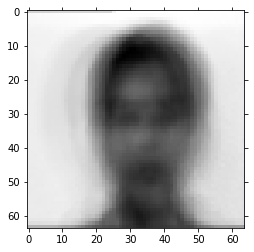

In [8]:
mean_face = np.mean(training_tensor,axis=0)
plt.imshow(mean_face.reshape(HEIGHT, WIDTH), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [9]:
normalised_training_tensor = training_tensor-mean_face

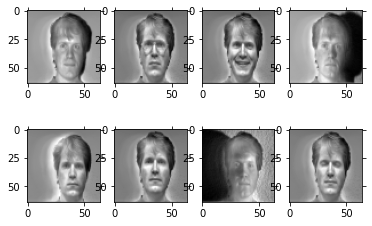

In [10]:
for i in range(min(training_im.shape[0],8)):
    img = normalised_training_tensor[i].reshape(HEIGHT,WIDTH)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Eigenvectors and values

In [11]:
cov_matrix = np.cov(normalised_training_tensor) / training_im.shape[0]
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(135, 135)
Covariance matrix of X: 
[[ 1.80490554e+01  6.10937243e+00  6.21610914e+00 ... -3.17009137e+00
  -3.29178205e+00  2.06945985e+00]
 [ 6.10937243e+00  1.00649598e+01  9.06999316e+00 ... -2.14603599e-02
  -2.21792666e-01  9.05659737e-01]
 [ 6.21610914e+00  9.06999316e+00  1.07198897e+01 ...  6.34313921e-01
   6.23806349e-01  5.76557546e-01]
 ...
 [-3.17009137e+00 -2.14603599e-02  6.34313921e-01 ...  2.46363799e+01
   2.28943429e+01 -7.03816445e-01]
 [-3.29178205e+00 -2.21792666e-01  6.23806349e-01 ...  2.28943429e+01
   2.44234828e+01 -3.18147283e-01]
 [ 2.06945985e+00  9.05659737e-01  5.76557546e-01 ... -7.03816445e-01
  -3.18147283e-01  1.34685811e+01]]


In [12]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.06484045+0.j          0.02271007+0.j         -0.04574441+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 [-0.02586807+0.j         -0.00019501+0.j         -0.04994809+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 [-0.02397221+0.j         -0.00753007+0.j         -0.04642091+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 ...
 [ 0.03381419+0.j         -0.09117673+0.j          0.03271617+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 [ 0.02982356+0.j         -0.10071192+0.j          0.02857239+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 [-0.02019039+0.j         -0.07176294+0.j         -0.03106351+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]]

Eigenvalues of Cov(X): 
[ 1.35040844e+03+0.00000000e+00j  4.87033654e+02+0.00000000e+0

In [13]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(eigenvalues.shape[0])]
eig_pairs.sort(reverse=True)
eigvalues_sort  = np.array([eig_pairs[index][0] for index in range(eigenvalues.shape[0])])
eigvectors_sort = np.array([eig_pairs[index][1] for index in range(eigenvalues.shape[0])])

### Plotting percentage of variance for each eigenvector

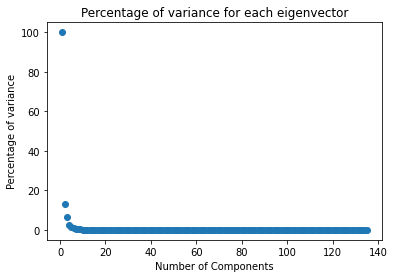

In [14]:
eigenvalues_var = (eigenvalues**2)/eigenvalues.shape[0]
eigenvalues_var_comp = eigenvalues_var / eigenvalues_var.shape[0]
plt.title('Percentage of variance for each eigenvector')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of variance')
plt.scatter(np.arange(1,eigenvalues.shape[0]+1), np.abs(eigenvalues_var_comp))
plt.show()

### Normalised Cumulative sorted eigenvalues for the eigenvectors

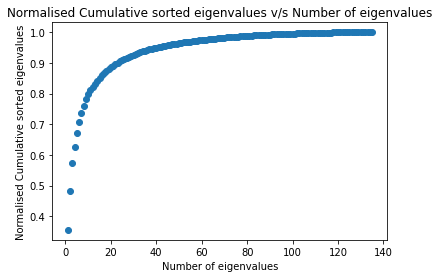

In [15]:
var_comp_sum = np.cumsum(eigvalues_sort) / np.sum(eigvalues_sort)

plt.title('Normalised Cumulative sorted eigenvalues v/s Number of eigenvalues')
plt.xlabel('Number of eigenvalues')
plt.ylabel('Normalised Cumulative sorted eigenvalues')
plt.scatter(np.arange(1,eigenvalues.shape[0]+1), np.abs(var_comp_sum))
plt.show()

## Calculate Dimensionality Reduction Matrix

In [16]:
reduced_data = np.array(eigvectors_sort[:DIM]).T
proj_data = (training_tensor.T @ reduced_data).T

### Plot the eigenfaces corresponding to the 8 highest eigenvectors

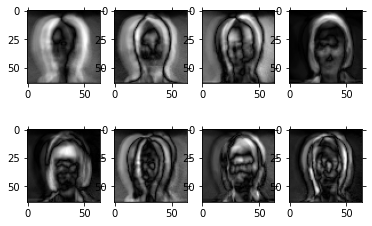

In [17]:
for i in range(min(8,proj_data.shape[0])):
    img = proj_data[i].reshape(HEIGHT,WIDTH)
    plt.subplot(2,4,1+i)
    plt.imshow(np.abs(img), cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Get the dimensionality reduced training vector

In [18]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

## Demonstration of face recognition process

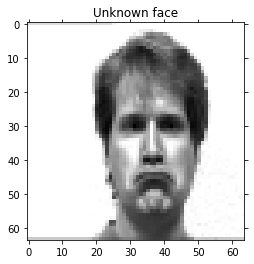

In [19]:
unknown_face = testing_im[0]
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

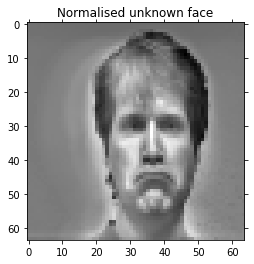

In [20]:
normalised_uface_vector = unknown_face_vector - mean_face

plt.imshow(normalised_uface_vector.reshape(HEIGHT, WIDTH), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [21]:
w_unknown = proj_data @ normalised_uface_vector
w_unknown.shape

(20,)

Label of Recognised face in training dataset1, label of testing image 1


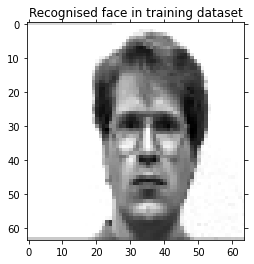

In [22]:
norms = np.linalg.norm(w - w_unknown, axis=1)
print(f"Label of Recognised face in training dataset{training_label[np.argmin(norms)]}, label of testing image {testing_label[0]}")
plt.imshow(training_im[np.argmin(norms)],cmap='gray')
plt.title('Recognised face in training dataset')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Recogniser function

In [23]:
def recogniser(curr_testing_im, curr_testing_label, proj_data, w, K, printflg=False, t0 = 30532474,t1 = 54836715):
    """
    Takes input unknown image, unknown image label, dimension reduction marix, dimensionally reduced training vector,
    k for K-Nearest-Neighbours and optional parameters to print recognition progress, cut-off for an image being a
    face in the dataset and cut-off for an image being a face.
    Returns the label of image and the image if a match is found in the training dataset, -1 and None if the image is
    a face but it is not found in the training dataset and -2 and None if the image is a not face.
    """
    unknown_face = curr_testing_im
    unknown_face_vector = np.array(curr_testing_im, dtype='float64').flatten()
    normalised_uface_vector = unknown_face_vector-mean_face
    w_unknown = proj_data @ normalised_uface_vector
    norms = np.linalg.norm(w - w_unknown, axis=1)
    index = np.argsort(norms)
    
    closestindex = {}
    for i in index:
        lab = training_label[i]
        if lab in closestindex:
            continue
        closestindex[lab] = i
    
    label_index = training_label[index]
    topklabels = stats.mode(label_index[:K])
    index = closestindex[topklabels[0].item()]
    if printflg:
        print(f"Detected image from training images index {index} and distance value {norms[index]}")

    if norms[index] < t1: # It's a face
        if norms[index] < t0: # Face recognised
            if printflg:
                print("Face recognised and found a match in the dataset")
            return training_label[index], training_im[index]
        else:
            if printflg:
                print("Face detected, but did not find it in the dataset")
            return -1, None
    else:
        if printflg:
            print("Face not detected")
        return -2, None

### Plot accuracy of recognition v/s K in K-Nearest-Neighbours Classifier


Trying for K = 1
Correct predictions: 26/30 = 86.66666666666667%

Trying for K = 2
Correct predictions: 25/30 = 83.33333333333334%

Trying for K = 3
Correct predictions: 26/30 = 86.66666666666667%

Trying for K = 4
Correct predictions: 25/30 = 83.33333333333334%

Trying for K = 5
Correct predictions: 24/30 = 80.0%

Trying for K = 6
Correct predictions: 23/30 = 76.66666666666667%

Trying for K = 7
Correct predictions: 24/30 = 80.0%

Trying for K = 8
Correct predictions: 24/30 = 80.0%

Trying for K = 9
Correct predictions: 23/30 = 76.66666666666667%

Trying for K = 10
Correct predictions: 23/30 = 76.66666666666667%

Trying for K = 11
Correct predictions: 23/30 = 76.66666666666667%

Trying for K = 12
Correct predictions: 22/30 = 73.33333333333333%

Trying for K = 13
Correct predictions: 22/30 = 73.33333333333333%

Trying for K = 14
Correct predictions: 18/30 = 60.0%

Trying for K = 15
Correct predictions: 17/30 = 56.666666666666664%

Trying for K = 16
Correct predictions: 19/30 = 63.3333

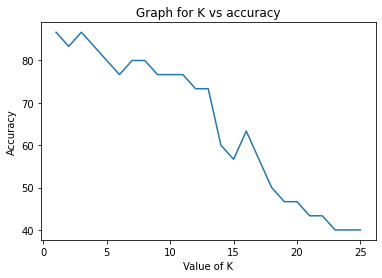

In [24]:
k = range(1, 26)
acc = []

for i in range(1, 26):
    ROW_SIZE = 5
    correct_pred = 0
    for idx, curr_testing_im in enumerate(testing_im):
        label, im = recogniser(curr_testing_im, testing_label[idx], proj_data, w, i)
        if label == testing_label[idx]:
            correct_pred += 1
    print(f"\nTrying for K = {i}")
    print('Correct predictions: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))
    acc.append(correct_pred/testing_im.shape[0]*100)
plt.plot(k, acc)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Graph for K vs accuracy")
plt.show()

## Displaying Result on the testing dataset

-------------
For testing image 0:

Detected image from training images index 1 and distance value 3183092.291156745
Face recognised and found a match in the dataset

The prediction is correct


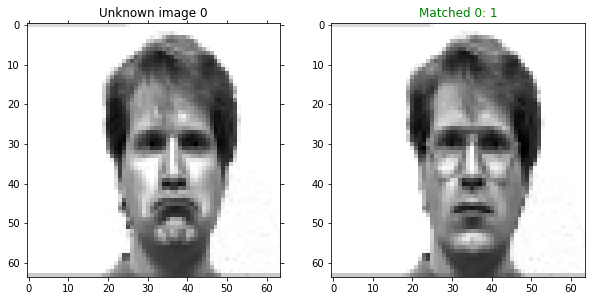

-------------
For testing image 1:

Detected image from training images index 8 and distance value 4480610.327699845
Face recognised and found a match in the dataset

The prediction is correct


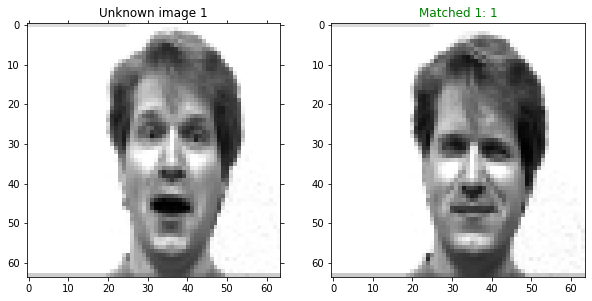

-------------
For testing image 2:

Detected image from training images index 12 and distance value 6928655.771037831
Face recognised and found a match in the dataset

The prediction is correct


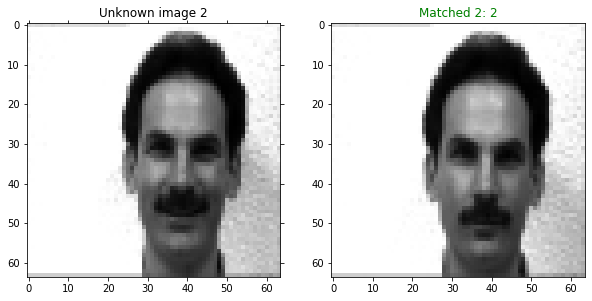

-------------
For testing image 3:

Detected image from training images index 13 and distance value 3513706.6710747587
Face recognised and found a match in the dataset

The prediction is correct


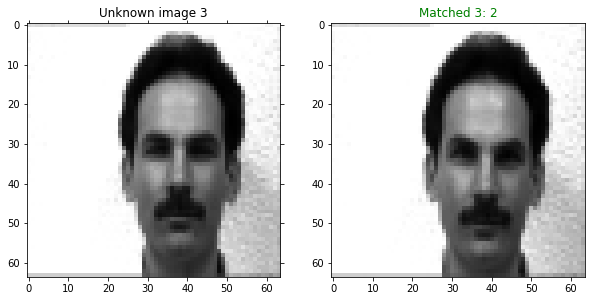

-------------
For testing image 4:

Detected image from training images index 20 and distance value 3612688.4258670714
Face recognised and found a match in the dataset

The prediction is correct


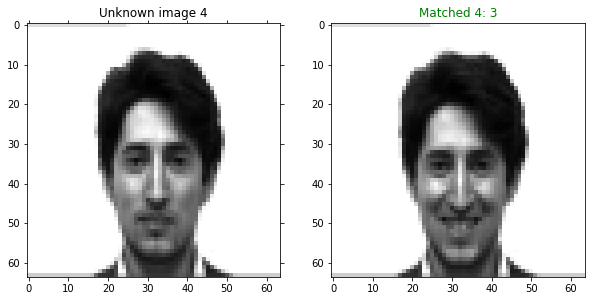

-------------
For testing image 5:

Detected image from training images index 20 and distance value 3612688.4258670714
Face recognised and found a match in the dataset

The prediction is correct


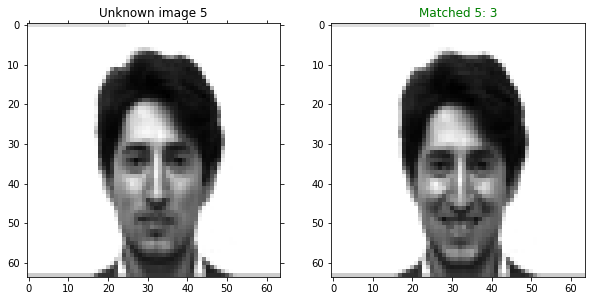

-------------
For testing image 6:

Detected image from training images index 35 and distance value 5973171.1663438855
Face recognised and found a match in the dataset

The prediction is correct


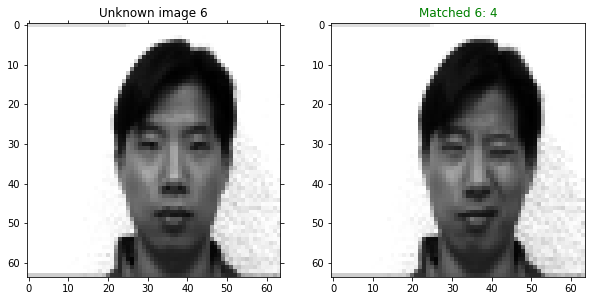

-------------
For testing image 7:

Detected image from training images index 32 and distance value 0.0
Face recognised and found a match in the dataset

The prediction is correct


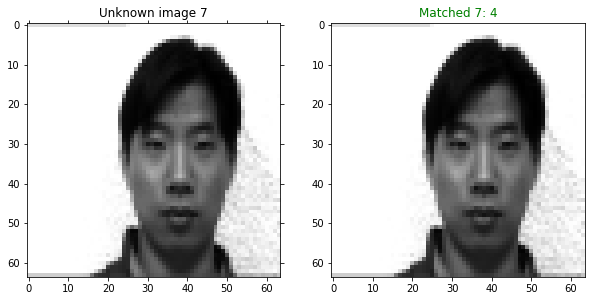

-------------
For testing image 8:

Detected image from training images index 43 and distance value 10267590.34590294
Face recognised and found a match in the dataset

The prediction is correct


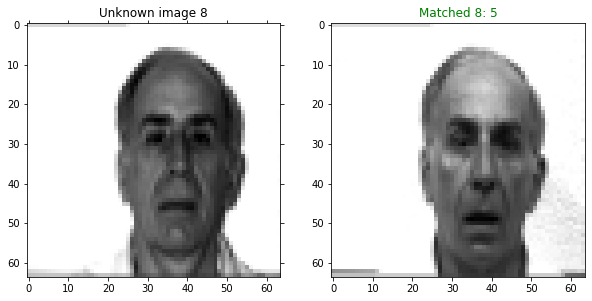

-------------
For testing image 9:

Detected image from training images index 44 and distance value 1762407.5204594964
Face recognised and found a match in the dataset

The prediction is correct


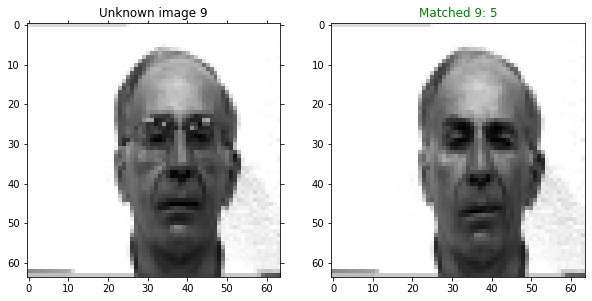

-------------
For testing image 10:

Detected image from training images index 48 and distance value 3872109.0225028754
Face recognised and found a match in the dataset

The prediction is correct


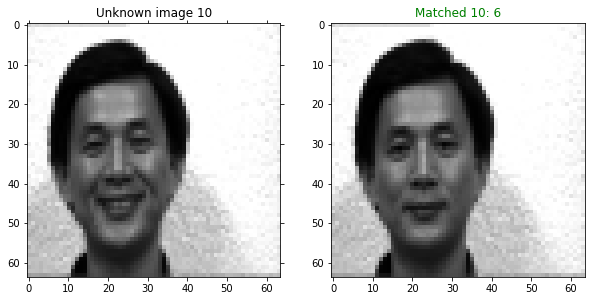

-------------
For testing image 11:

Detected image from training images index 48 and distance value 0.0
Face recognised and found a match in the dataset

The prediction is correct


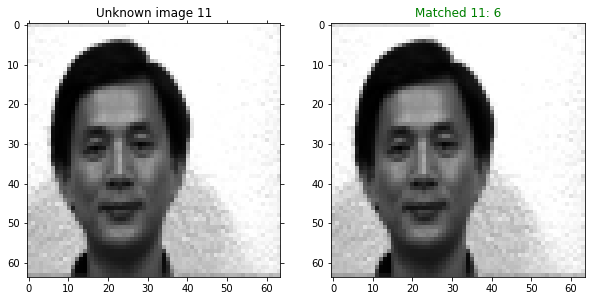

-------------
For testing image 12:

Detected image from training images index 58 and distance value 2112054.540411025
Face recognised and found a match in the dataset

The prediction is correct


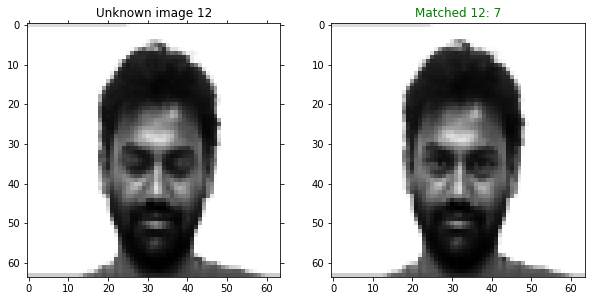

-------------
For testing image 13:

Detected image from training images index 62 and distance value 5985130.226939912
Face recognised and found a match in the dataset

The prediction is correct


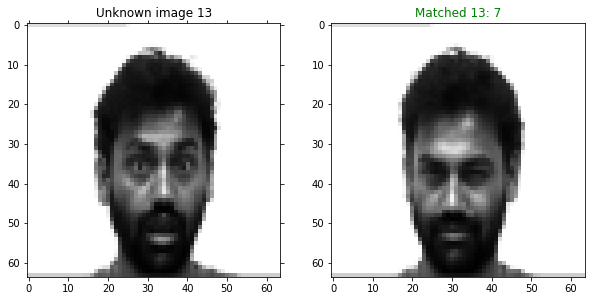

-------------
For testing image 14:

Detected image from training images index 57 and distance value 36686210.50561331
Face detected, but did not find it in the dataset

The prediction is incorrect


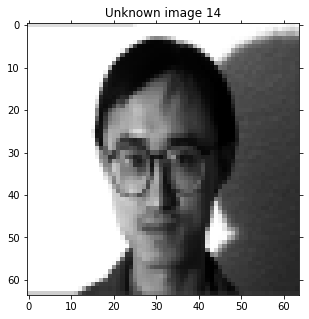

-------------
For testing image 15:

Detected image from training images index 114 and distance value 15047545.098104376
Face recognised and found a match in the dataset

The prediction is incorrect


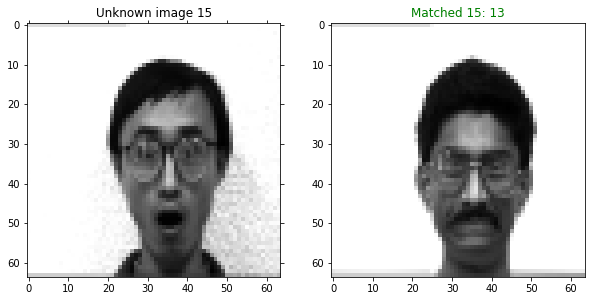

-------------
For testing image 16:

Detected image from training images index 23 and distance value 22095503.52749259
Face recognised and found a match in the dataset

The prediction is incorrect


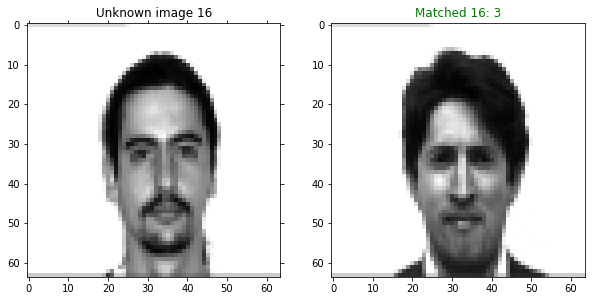

-------------
For testing image 17:

Detected image from training images index 79 and distance value 7064129.916250916
Face recognised and found a match in the dataset

The prediction is correct


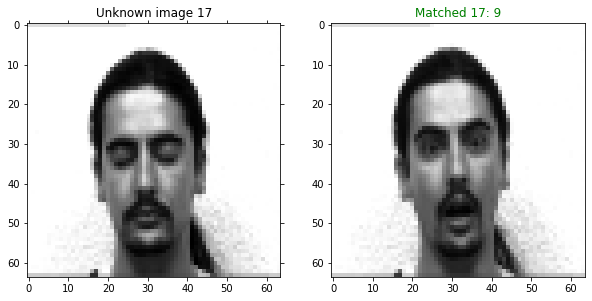

-------------
For testing image 18:

Detected image from training images index 3 and distance value 23802670.33221401
Face recognised and found a match in the dataset

The prediction is incorrect


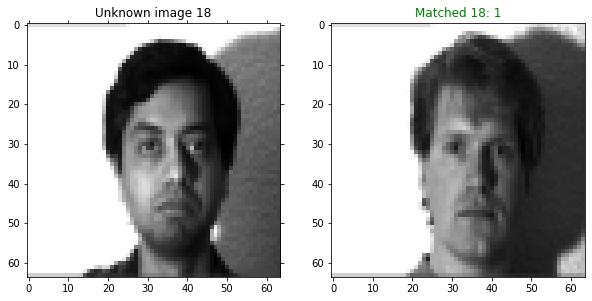

-------------
For testing image 19:

Detected image from training images index 83 and distance value 1550672.9116215159
Face recognised and found a match in the dataset

The prediction is correct


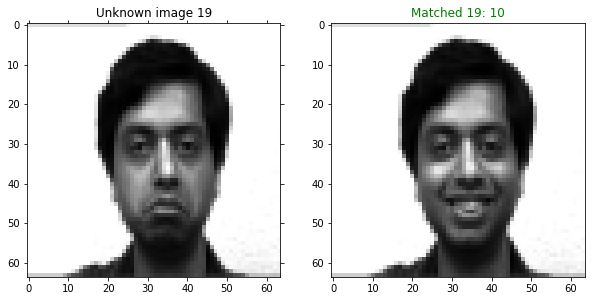

-------------
For testing image 20:

Detected image from training images index 90 and distance value 13867886.235481715
Face recognised and found a match in the dataset

The prediction is correct


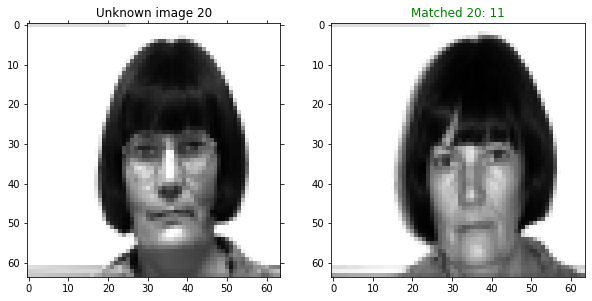

-------------
For testing image 21:

Detected image from training images index 97 and distance value 6326534.450867264
Face recognised and found a match in the dataset

The prediction is correct


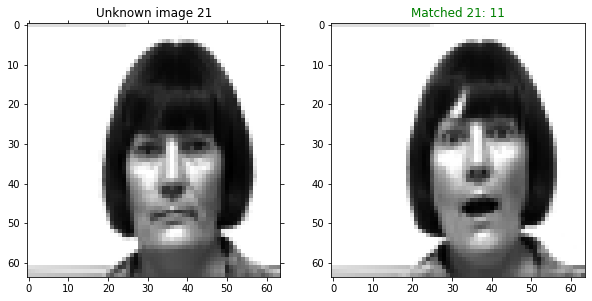

-------------
For testing image 22:

Detected image from training images index 103 and distance value 0.0
Face recognised and found a match in the dataset

The prediction is correct


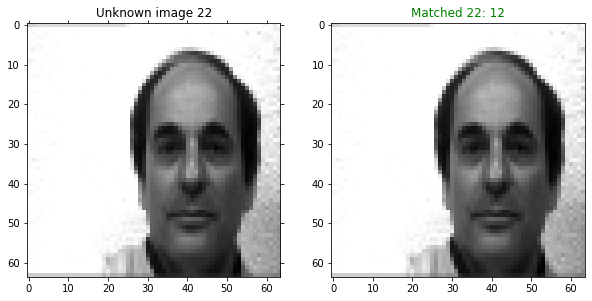

-------------
For testing image 23:

Detected image from training images index 105 and distance value 5652886.1660120115
Face recognised and found a match in the dataset

The prediction is correct


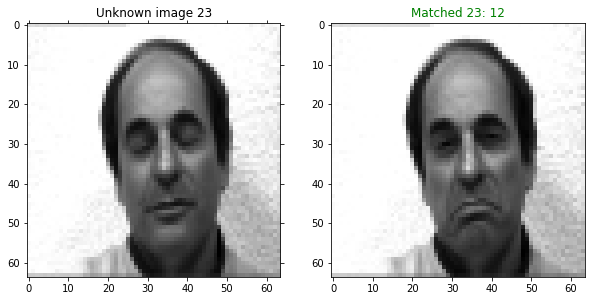

-------------
For testing image 24:

Detected image from training images index 114 and distance value 2852871.2257713103
Face recognised and found a match in the dataset

The prediction is correct


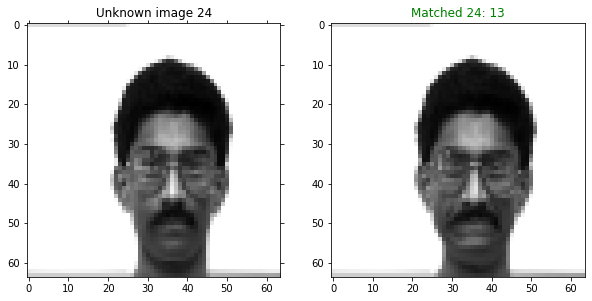

-------------
For testing image 25:

Detected image from training images index 109 and distance value 4009881.2525216653
Face recognised and found a match in the dataset

The prediction is correct


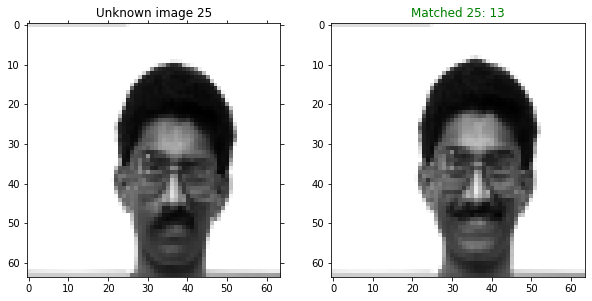

-------------
For testing image 26:

Detected image from training images index 118 and distance value 6874832.136900637
Face recognised and found a match in the dataset

The prediction is correct


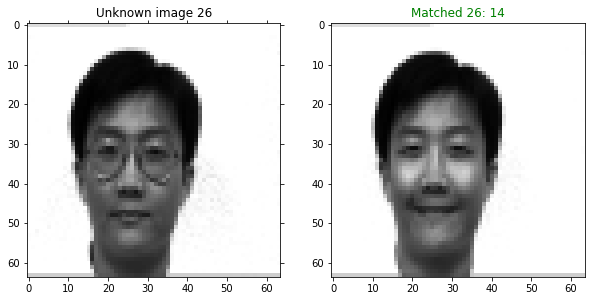

-------------
For testing image 27:

Detected image from training images index 118 and distance value 5436584.34195603
Face recognised and found a match in the dataset

The prediction is correct


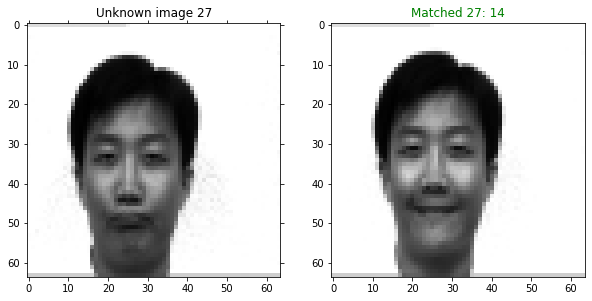

-------------
For testing image 28:

Detected image from training images index 131 and distance value 4148097.263759813
Face recognised and found a match in the dataset

The prediction is correct


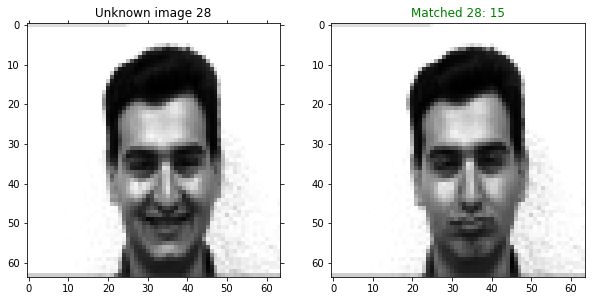

-------------
For testing image 29:

Detected image from training images index 133 and distance value 3522388.5837614965
Face recognised and found a match in the dataset

The prediction is correct


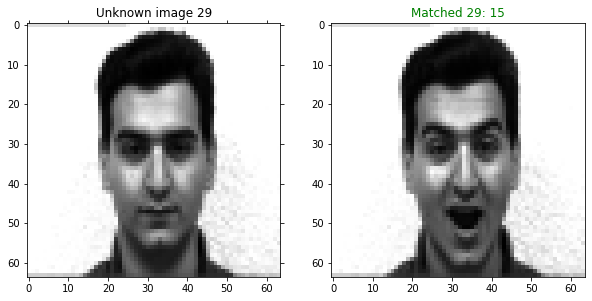

-------------
Accuracy: 26/30 = 86.66666666666667%


In [25]:
ROW_SIZE = 5
correct_pred = 0
print("-------------")
for idx, curr_testing_im in enumerate(testing_im):
    print(f"For testing image {idx}:\n")
    label, im = recogniser(curr_testing_im, testing_label[idx], proj_data, w, 3, True)
    if label == testing_label[idx]:
        print("\nThe prediction is correct")
        correct_pred += 1
    else:
        print("\nThe prediction is incorrect")
    if label >= 0:
        fig,ax = plt.subplots(ncols=2,figsize=(ROW_SIZE*2,ROW_SIZE))
        ax[0].imshow(curr_testing_im, cmap='gray')
        ax[0].set_title(f'Unknown image {idx}')
        ax[0].tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='on',left='off', which='both')
        ax[1].set_title(f'Matched {idx}: {label}', color='g')
        ax[1].imshow(im, cmap='gray')
    else:
        plt.figure(figsize=(ROW_SIZE,ROW_SIZE))
        plt.imshow(curr_testing_im, cmap='gray')
        plt.title(f'Unknown image {idx}')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='on',left='off', which='both')
    plt.show()
    print("-------------")
    
print('Accuracy: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))


### Loading new images of unseen faces and objects

In [26]:
im_size=(WIDTH,HEIGHT)
new_testing_im=[]
new_testing_label=[]
for i in os.listdir("YaleDataset/testing_set"):
    im = np.array(Image.open("YaleDataset/testing_set/"+i),'uint8')
    if len(im.shape) == 3:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    new_testing_im.append(im)
    new_testing_label.append(int(i.split(".")[0]))
new_testing_im=np.array(new_testing_im)
new_testing_label=np.array(new_testing_label)

### Displaying new images and their results 

For new testing image 0:

Detected image from training images index 14 and distance value 45449657.98160366
Face detected, but did not find it in the dataset

The prediction is correct


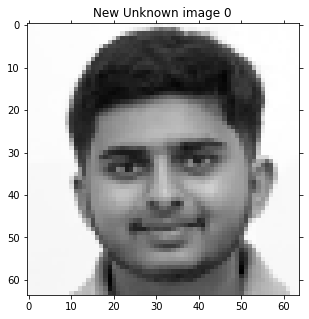

-------------
For new testing image 1:

Detected image from training images index 14 and distance value 53890902.467777275
Face detected, but did not find it in the dataset

The prediction is correct


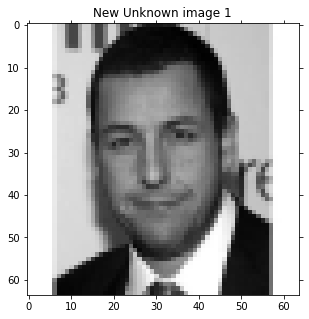

-------------
For new testing image 2:

Detected image from training images index 132 and distance value 42364121.895962484
Face detected, but did not find it in the dataset

The prediction is correct


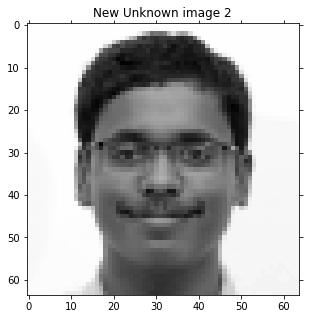

-------------
For new testing image 3:

Detected image from training images index 70 and distance value 53190982.98567941
Face detected, but did not find it in the dataset

The prediction is correct


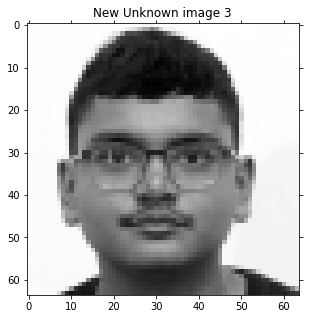

-------------
For new testing image 4:

Detected image from training images index 132 and distance value 40483335.228228115
Face detected, but did not find it in the dataset

The prediction is correct


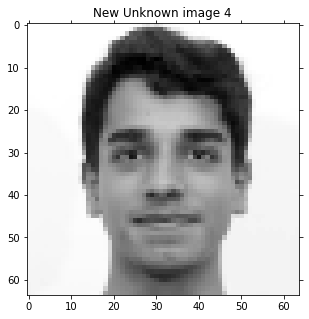

-------------
For new testing image 5:

Detected image from training images index 42 and distance value 55457249.54113859
Face not detected

The prediction is correct


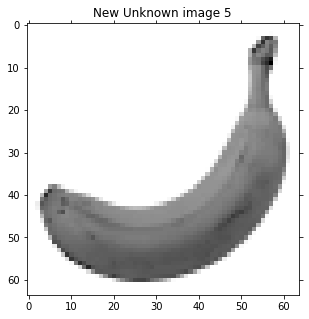

-------------
For new testing image 6:

Detected image from training images index 14 and distance value 59135632.23573265
Face not detected

The prediction is correct


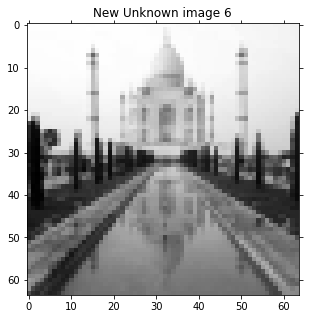

-------------


In [27]:
for idx, img in enumerate(new_testing_im):
    print(f"For new testing image {idx}:\n")
    label, im = recogniser(img, new_testing_label[idx], proj_data, w, 3, True)
    if label == new_testing_label[idx]:
        print("\nThe prediction is correct")
    else:
        print("\nThe prediction is incorrect")
    plt.figure(figsize=(ROW_SIZE,ROW_SIZE))
    plt.imshow(img, cmap='gray')
    plt.title(f'New Unknown image {idx}')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='on',left='off', which='both')
    plt.show()
    print("-------------")

### Plotting Accuracy v/s Number of eigenvectors to be considered in dimension reduction


Trying for 1 eigen vectors
Correct predictions: 12/30 = 40.0%

Trying for 2 eigen vectors
Correct predictions: 21/30 = 70.0%

Trying for 3 eigen vectors
Correct predictions: 21/30 = 70.0%

Trying for 4 eigen vectors
Correct predictions: 23/30 = 76.66666666666667%

Trying for 5 eigen vectors
Correct predictions: 24/30 = 80.0%

Trying for 6 eigen vectors
Correct predictions: 25/30 = 83.33333333333334%

Trying for 7 eigen vectors
Correct predictions: 25/30 = 83.33333333333334%

Trying for 8 eigen vectors
Correct predictions: 25/30 = 83.33333333333334%

Trying for 9 eigen vectors
Correct predictions: 25/30 = 83.33333333333334%

Trying for 10 eigen vectors
Correct predictions: 25/30 = 83.33333333333334%

Trying for 11 eigen vectors
Correct predictions: 26/30 = 86.66666666666667%

Trying for 12 eigen vectors
Correct predictions: 26/30 = 86.66666666666667%

Trying for 13 eigen vectors
Correct predictions: 26/30 = 86.66666666666667%

Trying for 14 eigen vectors
Correct predictions: 26/30 = 86

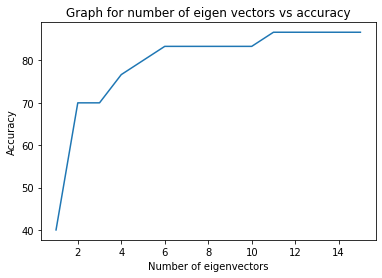

In [28]:
eigenvecs_list = range(1, 16)
acc = []

for num_of_eigenvecs in eigenvecs_list:
    reduced_data = np.array(eigvectors_sort[:num_of_eigenvecs]).T
    proj_data = (training_tensor.T @ reduced_data).T
    w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
    correct_pred = 0
    for idx, curr_testing_im in enumerate(testing_im):
        label, im = recogniser(curr_testing_im, testing_label[idx], proj_data, w, 3)
        if label == testing_label[idx]:
            correct_pred += 1
    print(f"\nTrying for {num_of_eigenvecs} eigen vectors")
    print('Correct predictions: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))
    acc.append(correct_pred/testing_im.shape[0]*100)
plt.plot(eigenvecs_list, acc)
plt.xlabel("Number of eigenvectors")
plt.ylabel("Accuracy")
plt.title("Graph for number of eigen vectors vs accuracy")
plt.show()

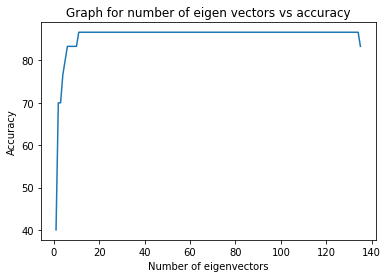

In [29]:
eigenvecs_list = range(1, 136)
acc = []
for num_of_eigenvecs in eigenvecs_list:
    reduced_data = np.array(eigvectors_sort[:num_of_eigenvecs]).T
    proj_data = (training_tensor.T @ reduced_data).T
    w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
    correct_pred = 0
    for idx, curr_testing_im in enumerate(testing_im):
        label, im = recogniser(curr_testing_im, testing_label[idx], proj_data, w, 3)
        if label == testing_label[idx]:
            correct_pred += 1
    acc.append(correct_pred/testing_im.shape[0]*100)
plt.plot(eigenvecs_list, acc)
plt.xlabel("Number of eigenvectors")
plt.ylabel("Accuracy")
plt.title("Graph for number of eigen vectors vs accuracy")
plt.show()

## Comparison with inbuilt methods in OpenCV

In [30]:
# Training the model
model = cv2.face.LBPHFaceRecognizer_create();
model.train(training_im, training_label)

In [31]:
label_to_image = {}
for idx, img in enumerate(training_im):
    label = training_label[idx]
    if label in label_to_image:
        continue
    label_to_image[label] = img

In [32]:
correct_count=0
total_count=0

def predict_image(test_image, curr_test_label):
    global correct_count, total_count
    label = model.predict(test_image)
    if label[0]==curr_test_label:
        correct_count+=1
    fig,ax = plt.subplots(ncols=2,figsize=(ROW_SIZE*2,ROW_SIZE))
    ax[0].imshow(test_image, cmap='gray')
    ax[0].set_title(f'Unknown image {idx}')
    ax[0].tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='on',left='off', which='both')
    ax[1].set_title(f'Matched {idx}: {label}', color='g')
    im = label_to_image[label[0]]
    ax[1].imshow(im, cmap='gray')
    total_count+=1
    plt.show()

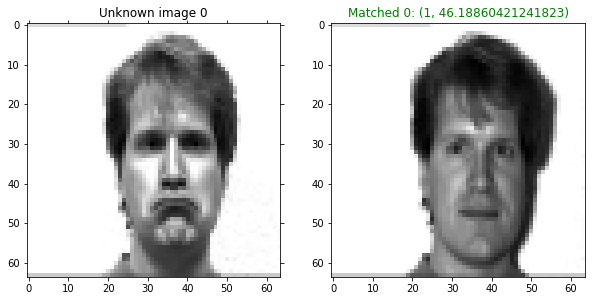

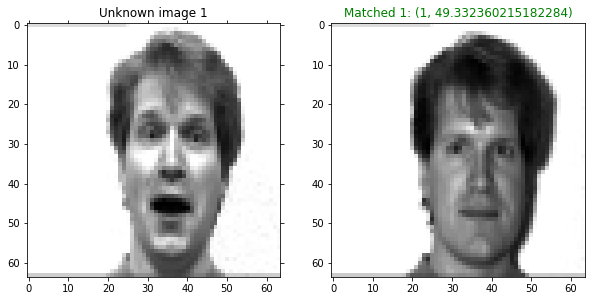

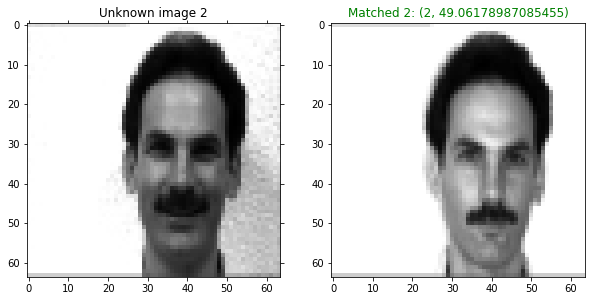

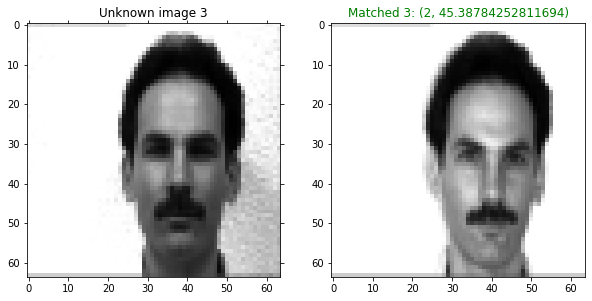

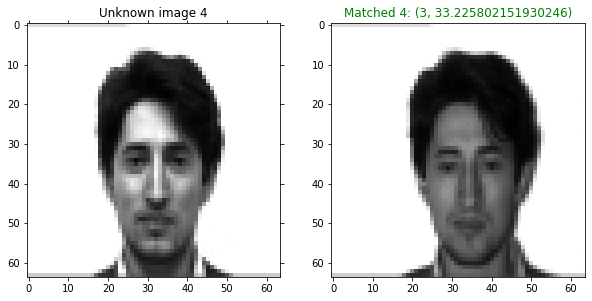

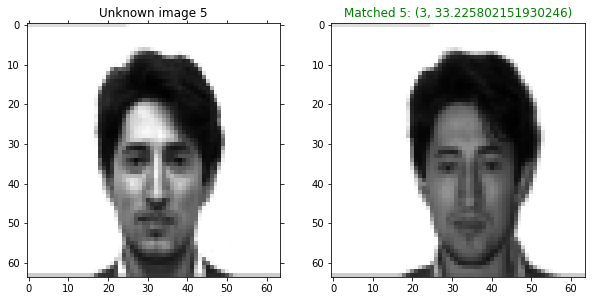

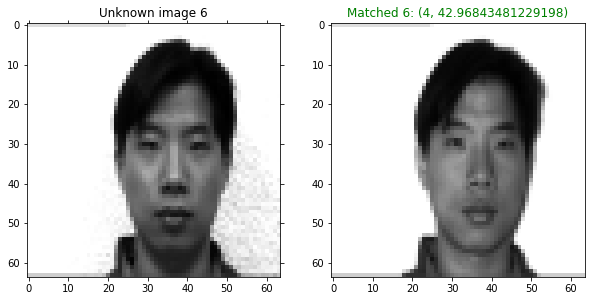

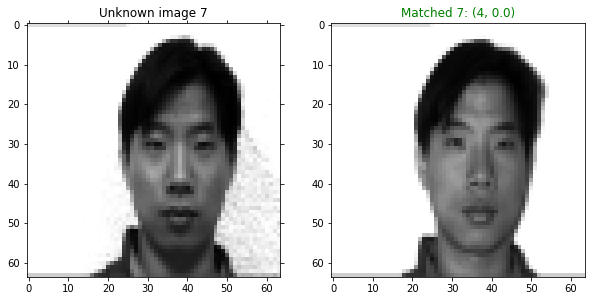

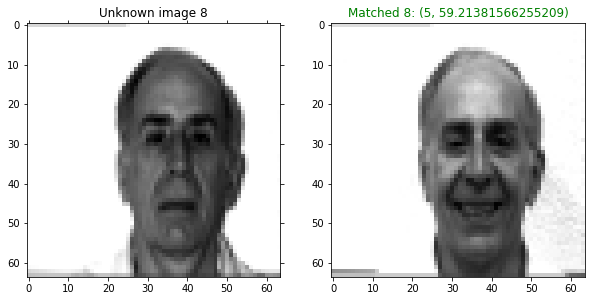

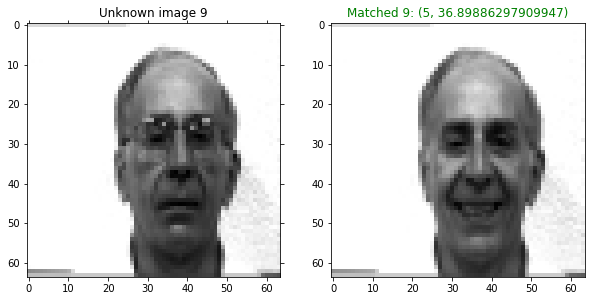

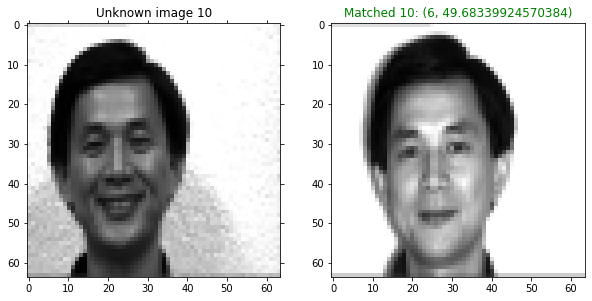

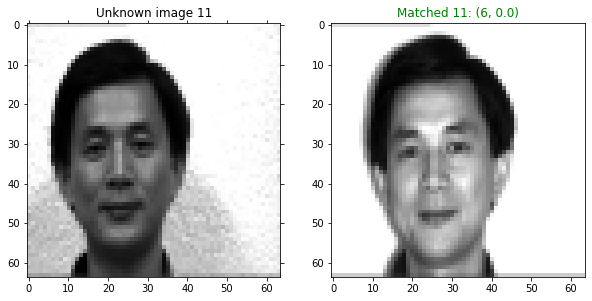

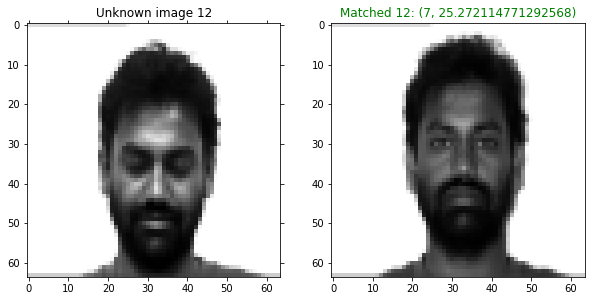

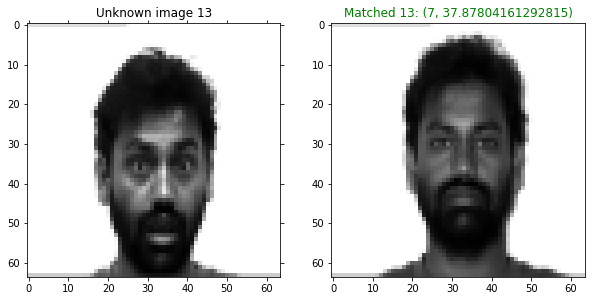

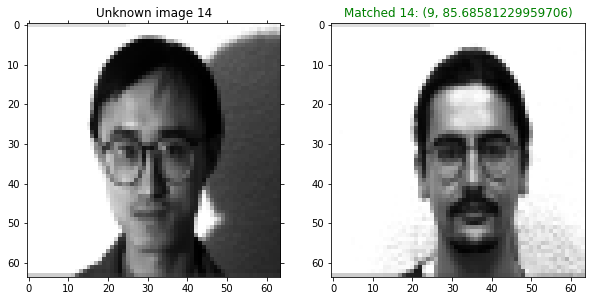

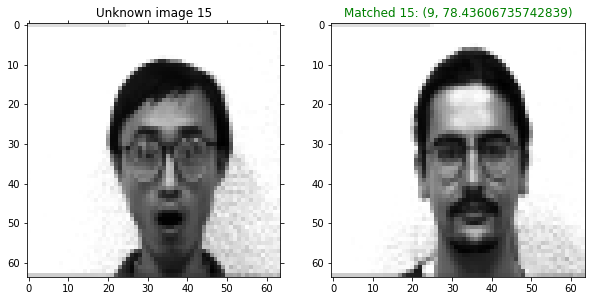

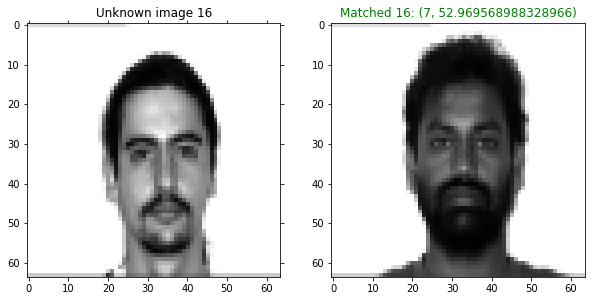

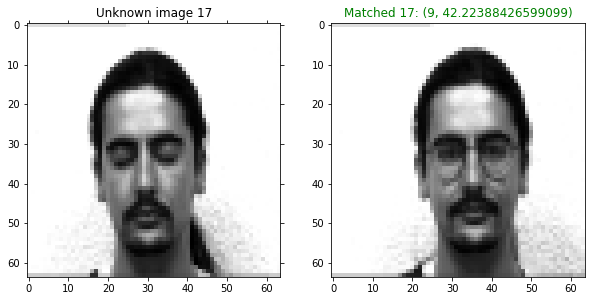

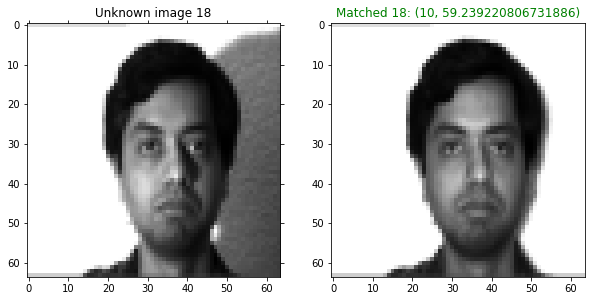

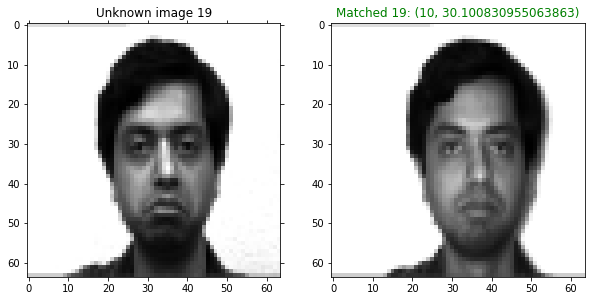

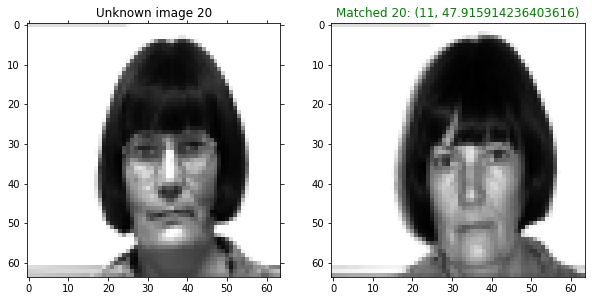

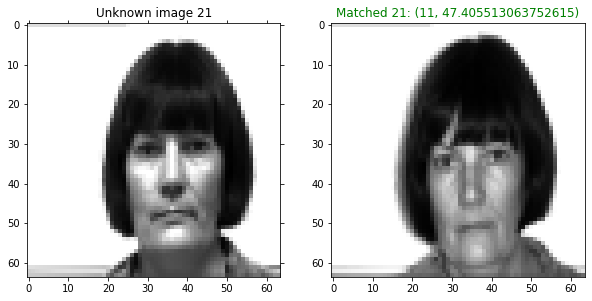

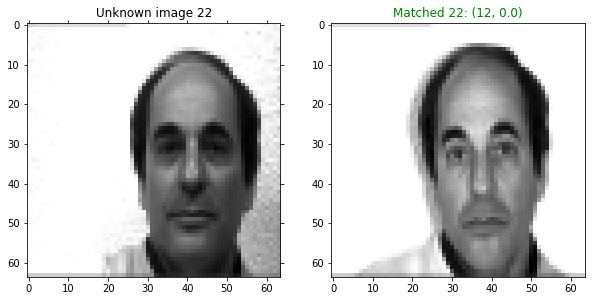

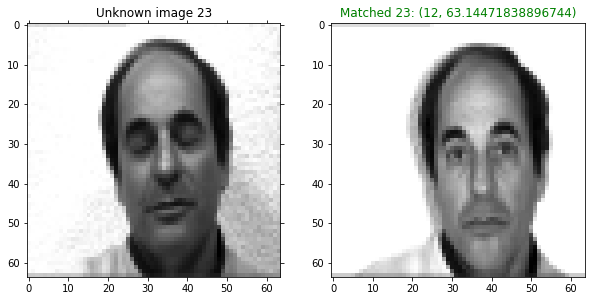

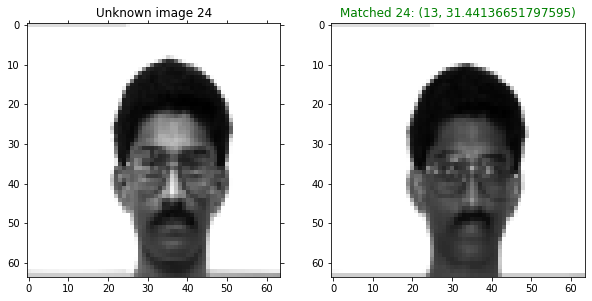

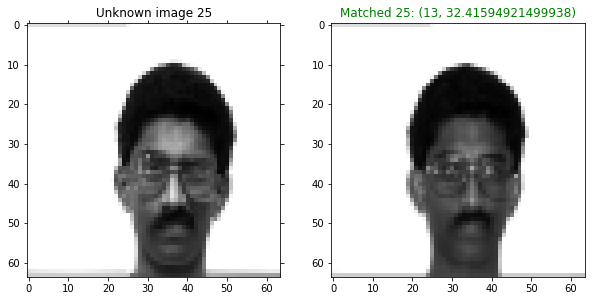

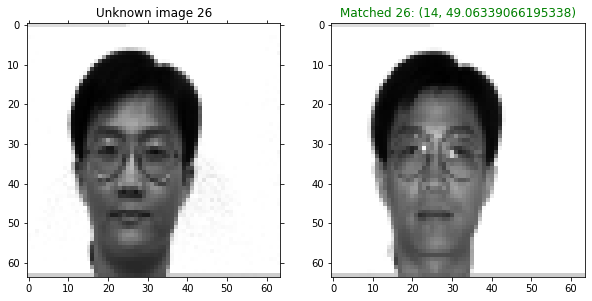

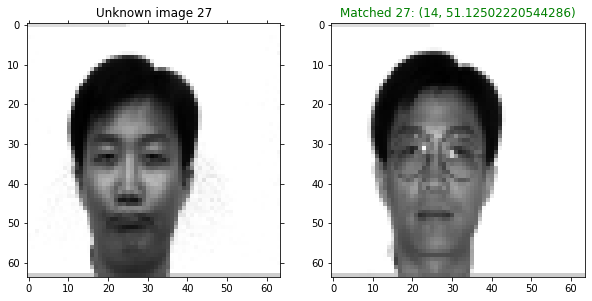

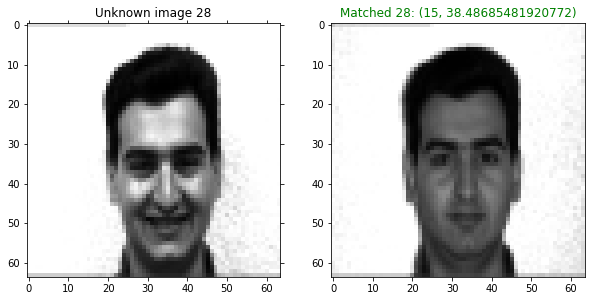

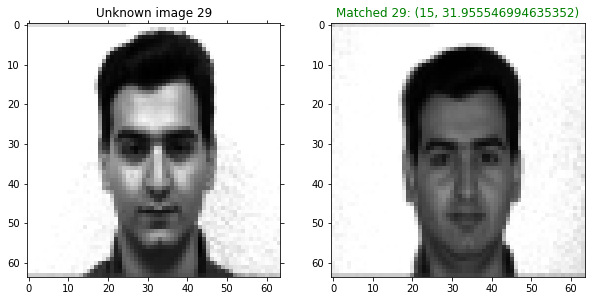

In [33]:
for idx, im in enumerate(testing_im):
    predict_image(im, testing_label[idx])

In [34]:
accuracy = 100*correct_count/total_count
print(f"Accuracy obtained: {accuracy}%")

Accuracy obtained: 90.0%
